# Aula 05c - Segmentação de imagens - Regiões

## Prof. João Fernando Mari

## Importando as bibliotecas necessárias

In [1]:
%matplotlib notebook
import numpy as np
from scipy import ndimage as ndi
from skimage import color, util, feature, morphology, data, filters
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Crescimento de regiões

### Criando uma imagem simples

- 5 x 5
- 3 bits. 8 níveis de intensidade, [0, 7]

In [2]:
img = np.array([[7, 0, 5, 6, 5],
                [5, 1, 5, 7, 7],
                [0, 3, 6, 5, 6],
                [2, 1, 7, 7, 6],
                [0, 1, 5, 6, 1]])

Criando a imagem de sementes.
- Deve ser uma imagem de rótulos.
- Cada semente deve possuir um único pixel. Caso possua mais do que um pixel, aplicar erosões sucessivas até restar apenas um pixel para cada semente.

In [3]:
img_seed = np.array([[0, 0, 0, 0, 0],
                     [0, 0, 0, 2, 0],
                     [0, 0, 0, 0, 0],
                     [0, 1, 0, 0, 0],
                     [0, 0, 0, 0, 0]])

### Plota as imagens

<IPython.core.display.Javascript object>


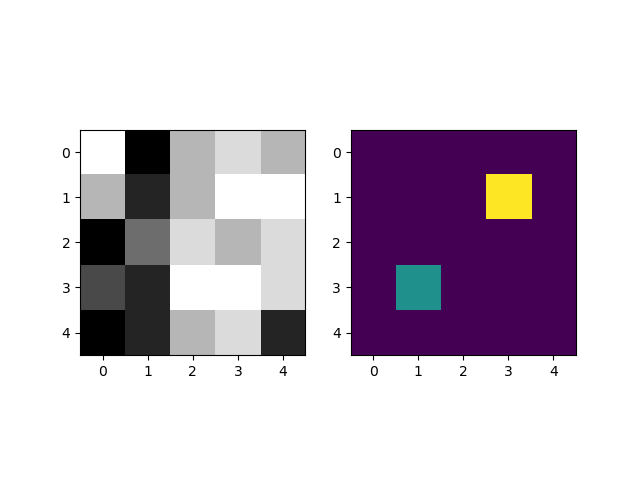

In [4]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
## plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(img_seed)
plt.show()

### Exemplo com uma imagem REAL (DESCOMENTAR)

In [5]:
# # Imagem "REAL"
# # -------------
# img = data.coffee()
# img = color.rgb2gray(img)

# img = util.img_as_ubyte(filters.gaussian(img, sigma=4))

# # Informações sobre as imagens
# print(img.shape, img.dtype, img.min(), img.max())

# # Constrói a imagem de sementes
# # -----------------------------
# img_seed = np.zeros(img.shape, dtype=img.dtype)
# img_seed[266, 276] = 1 # xicara
# img_seed[155, 350] = 2 #  café
# img_seed[77, 526] = 3 # mesa

# # Plota as imagens
# # ----------------
# plt.figure()
# plt.subplot(1,2,1)
# plt.imshow(img, cmap='gray')
# ## plt.colorbar()
# plt.subplot(1,2,2)
# plt.imshow(morphology.dilation(img_seed, morphology.disk(3)))
# plt.show()

## Implementaçao simples do algoritmo de crescimento de regiões


Número de sementes
2

Lista com os valores dos pixels sob as sementes:
[1, 7]

Imagens contendo as diferenças absolutas entre a imagem f e os pixel sob as sementes


<IPython.core.display.Javascript object>


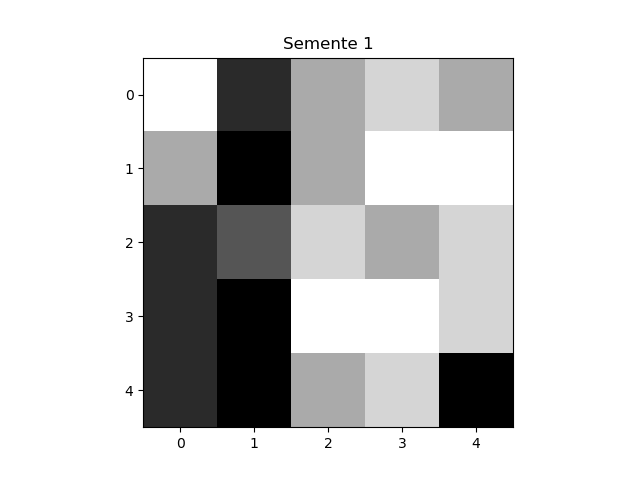

<IPython.core.display.Javascript object>


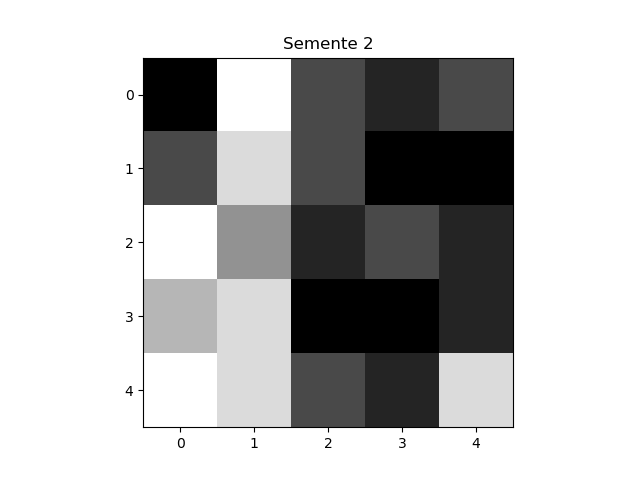


Etapa de crescimento das regiões:

>> Semente 0

>> Semente 1


<IPython.core.display.Javascript object>


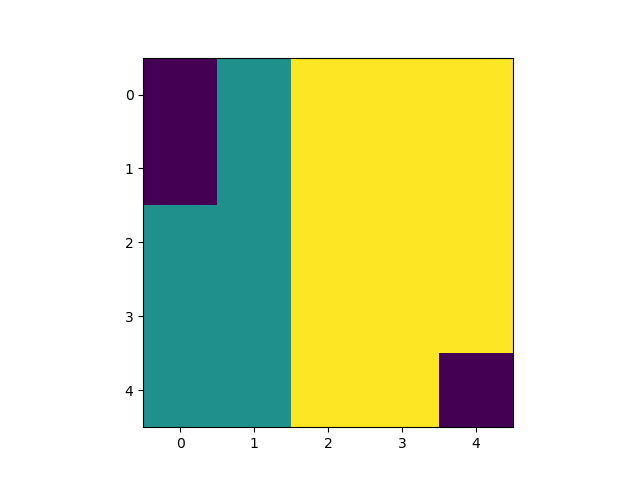

In [7]:
# ***** SELECIONE O VALOR DE T *****
# *** Obs.: Alterar quando usar imagens reais ***
# Critério Q: os pixels cujas diferenças absolutas em relação aos pixels sob as sementes devem ser menores do que T.
T = 3 # Sugestões: 3, 5 e 8. Imagem real: 100, 110, 120

does_print = False

# Obtendo o número de sementes
num_seeds = img_seed.max()
# TEST
print('\nNúmero de sementes')
print(num_seeds)

# Lista contendo os valores dos pixels sob as sementes.
seed_values = []

for i in range(num_seeds):
    seed_value = img[img_seed==(i+1)]
    ## print(seed_value)
    seed_values.append(seed_value[0])
# TEST
print('\nLista com os valores dos pixels sob as sementes:')
print(seed_values)

# Lista das diferenças absolutas entre f e os valores dos pixels sobre as sementes
img_dif_list = []
for seed in seed_values:
    img_dif_temp = np.abs(img - seed)
    
    img_dif_list.append(img_dif_temp)  
    
print('\nImagens contendo as diferenças absolutas entre a imagem f e os pixel sob as sementes')
for i, (seed, img_dif) in enumerate(zip(seed_values, img_dif_list)):
    if does_print:
        print('Semente: %d. Valor do pixel: %d' % (i, seed))
        print(img_dif)
        

    plt.figure()
    plt.imshow(img_dif, cmap='gray')
    plt.title('Semente %d' % (i+1))

# print('\nPixels que estão de acordo com o critério Q')
# for i, (seed, img_q) in enumerate(zip(seed_values, img_q_list)):
#     print('Semente: %d. Valor do pixel: %d' % (i, seed))
#     print(img_q)
    
# Inicializa a imagem de saída com zeros.
img_out = np.zeros(img.shape)
    
print('\nEtapa de crescimento das regiões:')
# Manter apenas os pixels em img_q que são 8-conectados a semente
# (Dilatações condicionais sucessivas)
for i, (seed, img_dif) in enumerate(zip(seed_values, img_dif_list)):
    print('\n>> Semente ' + str(i))
    
    # Pixels que estão de acordo com o critério Q
    img_q = img_dif < T
    
    # Remove os pixels que já foram atribuidos a outras sementes.
    # Resolve ambiguidades. O primeiro leva tudo!
    img_q[img_out.astype(bool)] = 0

    # Imagem inicial contendo apenas uma semente para o crescimento de regiões
    img_dil = img_seed == (i + 1)
    
    # Número de pixels na imagem. Critério de parada.
    num_px = img_dil.sum()
    
    dil_count = 0
    
    while True:
        # Dilatação com elemento estruturante 3x3 (8-conectado)
        img_dil = morphology.dilation(img_dil, np.ones([3,3]))
        
        # Apenas pixels em img_q
        img_dil = np.logical_and(img_dil, img_q)
        
        dil_count = dil_count + 1
        
        if does_print:
            print('\nDilatação ' + str(dil_count))
            print(img_dil)
        
        if num_px == img_dil.sum():
            # O número de pixels não aumentou
            break
        else:
            num_px = img_dil.sum()
    
    img_out[img_dil==True] = (i + 1)
    
    if does_print:
        print('\nimg_out')
        print(img_out)
    
if does_print:
    print('\nImagem de saída')
    print('---------------')
    print(img_out)

plt.figure()
plt.imshow(img_out)
plt.show()

# Bibliografia

MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.

    Disponível para download no site do autor (Exclusivo para uso pessoal)

    http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

    Disponível na Biblioteca Virtual da Pearson.

J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.

    http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

Universidade de Waterloo. Image Repository.

    http://links.uwaterloo.ca/Repository.html
    
The USC-SIPI Image Database.    
    
    http://sipi.usc.edu/database/database.php
    
Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    
    Disponível em: http://scipy-lectures.org/

scikit-image. Documentação.

    https://scikit-image.org/docs/dev/index.html

scikit-image. Documentação. Módulo 'filters'.

    https://scikit-image.org/docs/dev/api/skimage.filters.html
    
scikit-image. Documentação. Módulo 'feature'.

    https://scikit-image.org/docs/dev/api/skimage.feature.html
    
scikit-image.Documentação. Módulo 'segmentation'.

    https://scikit-image.org/docs/dev/api/skimage.segmentation.html
    
scikit-image. Comparing edge-based and region-based segmentation.

    https://scikit-image.org/docs/dev/auto_examples/applications/plot_coins_segmentation.html
        
scikit-image. Label image regions.

    https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html
    
NumPy. Documentação.

       https://numpy.org/doc/stable/
        
NumPy. Convolução
        
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html